# ML Regularized Neural Network

We will implement the backpropagation algorithm for neural networks and apply it to the task of hand-written digit recognition.

The digits are labeled from 0 to 9.

NN architecture:

Input layer: 400 units (image 20x20)

Hidden layer: 25 units

Output layer: 10 units (0-9).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import random

## =========== Part 1: Loading and Visualizing Data =============

In [2]:
data = pd.read_csv('../../machine-learning-ex3/ex3_python/ex3data1.txt', names=[str(i) for i in range(1, 402)])
print('Profiling Data')
print(data.info())
print(data.head())

Profiling Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 401 entries, 1 to 401
dtypes: float64(395), int64(6)
memory usage: 15.3 MB
None
   1    2    3    4    5    6    7    8    9   10 ...   392  393  394  395  \
0  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4  0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

   396  397  398  399  400  401  
0  0.0  0.0  0.0  0.0    0    0  
1  0.0  0.0  0.0  0.0    0    0  
2  0.0  0.0  0.0  0.0    0    0  
3  0.0  0.0  0.0  0.0    0    0  
4  0.0  0.0  0.0  0.0    0    0  

[5 rows x 401 columns]


In [3]:
x = np.array(data[[str(i) for i in range(1, 401)]]) # training set
y = np.array(data['401']) # labels (0-9)
[m, n] = np.shape(x)

Text(0.5, 1.0, 'Digits examples: 0, 5, 7, 9')

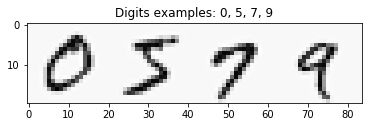

In [4]:
digitMatrix = np.column_stack([np.reshape(x[0], [20, 20]), np.zeros([20, 1]), \
                               np.reshape(x[2500], [20, 20]), np.zeros([20, 1]), \
                               np.reshape(x[3500], [20, 20]), np.zeros([20, 1]), \
                               np.reshape(x[4500], [20, 20]), np.zeros([20, 1])])
plt.imshow(digitMatrix, cmap='Greys', interpolation='nearest')
plt.title("Digits examples: %s, %s, %s, %s" % (y[0], y[2500], y[3500], y[4500]))
# plt.show()

## ============ Part 2: Training the Model ============

### NN Architecture

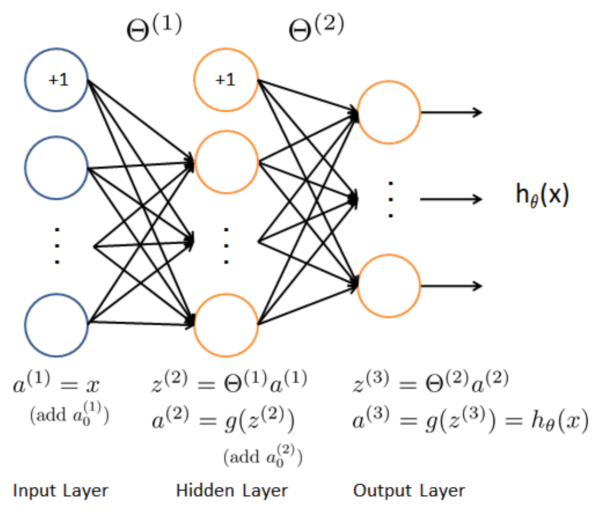

### Activation Function
We will use the sigmoid function as our activation function.

$g(z) = \frac{1}{1 + e^{-z}}$

When:

$z = 0$ then $g = 0.5$

$z \rightarrow +\infty$ then $g \rightarrow +1$

$z \rightarrow -\infty$ then $g \rightarrow 0$

In [5]:
"""
Sigmoid activation function
"""
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Sigmoid Prime ($g'$)

Compute the gradient of the sigmoid function.

$ g'(z) = \dfrac{\partial g}{\partial z} = g(z) * (1 - g(z))$

In [16]:
"""
Sigmoid prime
"""
def sigmoid_prime(z):
    g = sigmoid(z)
    return np.multiply(g, (1 - g))